# Pymaceuticals Inc.
---

### Analysis

I have been analysing the effect of different drugs on the development of SCC tumors in mice. The purpose of this study is to identify the comparitive performance of Capomulin against other drugs.

From the Summary Statistics Table, it is evident that whilst other drugs caused an increase in the tumor volume, Capomulin was effective in reducing tumor volume in mice (from 45.0 to 40.68). Another drug which performed equally well was Ramicane, which also saw a reduction in tumor volume by 5mm3. 

On the other hand, Ketapril was the least effective drug as it increased tumor volume by approximately 10mm3. 

A deeper look into the Capomulin treatment of Mouse L509 demonstrates that over the course of the first 20 days, the tumor volume surprisingly increased. Thereafter, it began to decrease quite rapidly. 

Furthermore, there is a strong positive correlation (0.84) between the weight of mice and the average tumor volume for Capomulin. This suggests that Capomulin is more effective in mice who weigh less compared to heavier mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = combined_df['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df['Mouse ID']=='g989']
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] !='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_df.sort_values("Tumor Volume (mm3)").groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                                 "Median Tumor Volume":median, 
                                 "Tumor Volume Variance":variance, 
                                 "Tumor Volume Std. Dev.":stdev, 
                                 "Tumor Volume Std. Err.":SEM})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

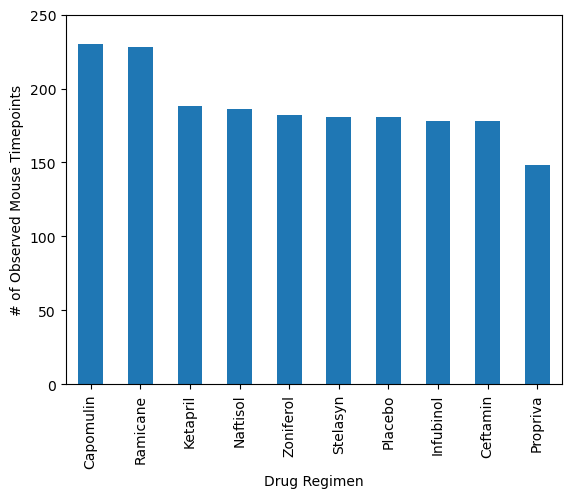

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.ylim(0, max(drug_count) + 20)
plt.show()

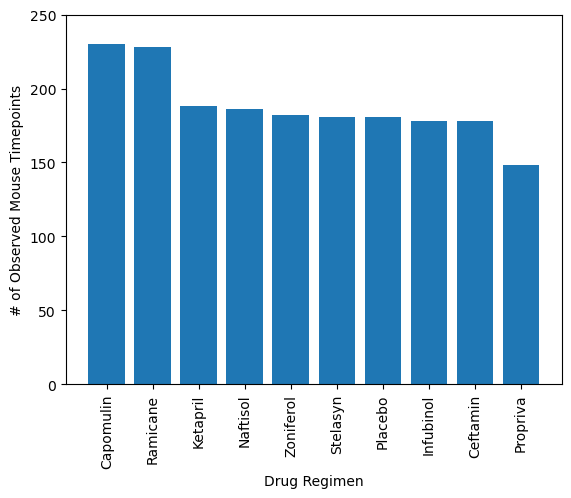

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = clean_df["Drug Regimen"].value_counts()
plt.bar(drug_count.index, drug_count.values)
plt.xticks(rotation="vertical")
plt.ylim(0, max(drug_count) + 20)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


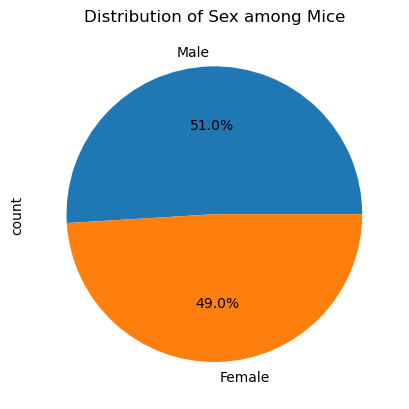

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df["Sex"].value_counts()
sex_count.plot(kind="pie", labels=sex_count.index, autopct="%1.1f%%", 
              title = "Distribution of Sex among Mice")
plt.show()

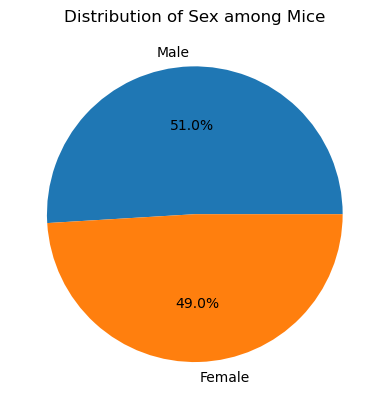

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df["Sex"].value_counts()
plt.pie(sex_count.values, labels=sex_count.index, autopct="%1.1f%%")
plt.title("Distribution of Sex among Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_treatments_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                                   (clean_df["Drug Regimen"] == "Ramicane") | 
                                   (clean_df["Drug Regimen"] == "Infubinol") | 
                                   (clean_df["Drug Regimen"] == "Ceftamin"), : ]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = selected_treatments_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]], on=["Mouse ID", "Timepoint"], how="left")
final_tumor_vol_df.head()


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[]for treatment in treatments]

for x in range(len(final_tumor_vol_df)):
    if final_tumor_vol_df["Drug Regimen"][x] == treatments[0]:
        tumor_vol_data[0].append(final_tumor_vol_df["Tumor Volume (mm3)"][x])
    elif final_tumor_vol_df["Drug Regimen"][x] == treatments [1]:
        tumor_vol_data[1].append(final_tumor_vol_df["Tumor Volume (mm3)"][x])
    elif final_tumor_vol_df["Drug Regimen"][x] == treatments [2]:
        tumor_vol_data[2].append(final_tumor_vol_df["Tumor Volume (mm3)"][x])
    elif final_tumor_vol_df["Drug Regimen"][x] == treatments [3]:
        tumor_vol_data[3].append(final_tumor_vol_df["Tumor Volume (mm3)"][x])
        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

print(treatments)

for data in tumor_vol_data:
    tumor_vol = pd.Series(data)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"IQR: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     
    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} could be potential outliers.")
    print(f"Values above {upper_bound} could be potential outliers.")  
    
    outliers = (tumor_vol.loc[(tumor_vol > upper_bound) | (tumor_vol < lower_bound)]).count()
    print(f"Number of outliers: {outliers}")
    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
IQR: 7.781863460000004
Values below 20.70456164999999 could be potential outliers.
Values above 51.83201549 could be potential outliers.
Number of outliers: 0
IQR: 9.098536719999998
Values below 17.912664470000003 could be potential outliers.
Values above 54.30681135 could be potential outliers.
Number of outliers: 0
IQR: 11.477135160000003
Values below 36.83290494999999 could be potential outliers.
Values above 82.74144559000001 could be potential outliers.
Number of outliers: 1
IQR: 15.577752179999997
Values below 25.355449580000002 could be potential outliers.
Values above 87.66645829999999 could be potential outliers.
Number of outliers: 0


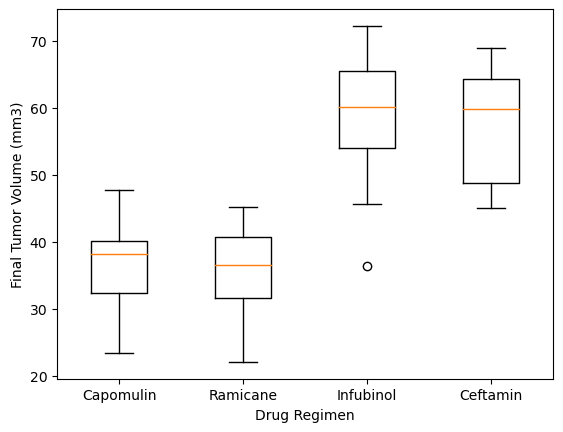

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

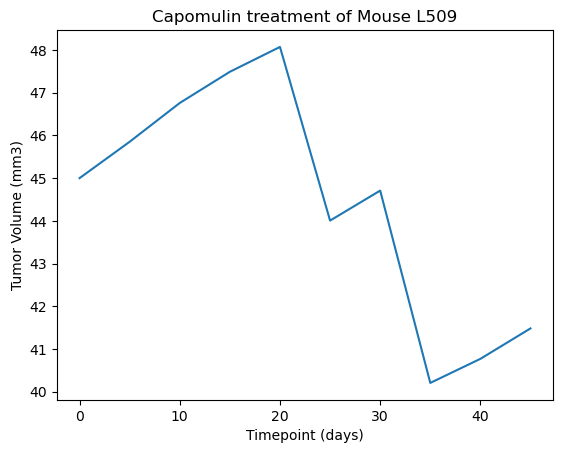

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = clean_df.loc[clean_df["Mouse ID"] == "l509"]
x_axis = mouse_id["Timepoint"]
y_axis = mouse_id["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse L509")
plt.show()

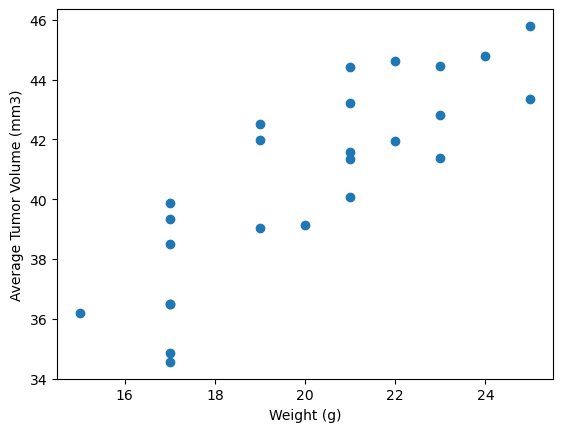

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].max()
average_volume = capomulin.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
y = 0.95 x + 21.55


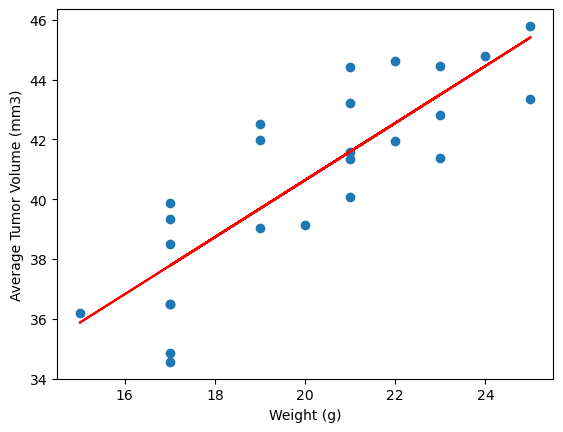

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, average_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr)= linregress(weight, average_volume)
regress_values = weight * slope + intercept
line_eq = print(f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(weight, average_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight, regress_values, color="red")
plt.show()